In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
tickers = ['SPY', 'QQQ', 'VEA', 'IWM', 'VWO',       # 5 ETFs (45%)
           'TLT', 'LQD',                            # 2 Bonds (25%)
           'GLD', 'DBC',                            # 2 Commodities (20%)
           'BTC-USD', 'ETH-USD']                    # 2 Crypto (10%)

weights = np.array([
    0.09, 0.09, 0.09, 0.09, 0.09,   # ETFs (45% total)
    0.125, 0.125,                  # Bonds (25%)
    0.10, 0.10,                    # Commodities (20%)
    0.05, 0.05                     # Crypto (10%)
])

In [53]:
def get_data(tickers):
    data = yf.download(tickers, auto_adjust=True, period='max')['Close']
    data = data.dropna()
    data.columns = data.columns.get_level_values(0)
    return data

In [54]:
def calculate_performance(returns: pd.DataFrame, weights: np.ndarray):
    portfolio_returns = returns.dot(weights)
    cumulative_returns = (1 + portfolio_returns).cumprod()

    # Risk Metrics
    annualized_return = portfolio_returns.mean() * 252
    annualized_volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility

    # Print Results
    print("📈 Portfolio Performance Metrics")
    print(f"Annualized Return:     {annualized_return:.2%}")
    print(f"Annualized Volatility: {annualized_volatility:.2%}")
    print(f"Sharpe Ratio:          {sharpe_ratio:.2f}")
    
    return {
        'daily_returns': portfolio_returns,
        'cumulative_returns': cumulative_returns,
        'annualized_return': annualized_return,
        'annualized_volatility': annualized_volatility,
        'sharpe_ratio': sharpe_ratio
    }

In [57]:
def calculate_performance(returns, weights):
    portfolio_returns = returns.dot(weights)
    cumulative_returns = cumulative = (1 + portfolio_returns).cumprod()

    #Risk Metrics
    annualized_return = portfolio_returns.mean() * 252
    annualized_volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility

    #Print Results
    print("Portfolio Performance Metrics:")
    print(f"Annualized Return:    {annualized_return:.2%}")
    print(f"Annualized Volatility:{annualized_volatility:.2%}")
    print(f"Sharpe Ratio:         {sharpe_ratio:.2f}")
    
    return {
        'daily_returns': portfolio_returns,
        'cumulative_returns': cumulative_returns,
        'annualized_return': annualized_return,
        'annualized_volatility': annualized_volatility,
        'sharpe_ratio': sharpe_ratio
    }    

In [65]:
def SPY_Comparison(returns, weights, price_data):
    portfolio_returns = returns.dot(weights)
    cumulative_portfolio = (1 + portfolio_returns).cumprod()
    
    # Extract SPY returns and cumulative returns
    spy_returns = returns['SPY']
    cumulative_spy = (1 + spy_returns).cumprod()
    
    # Plot both
    plt.figure(figsize=(12,6))
    plt.plot(cumulative_portfolio.index, cumulative_portfolio, label='Portfolio')
    plt.plot(cumulative_spy.index, cumulative_spy, label='SPY (Benchmark)')
    
    plt.title('Cumulative Returns: Portfolio vs SPY')
    plt.xlabel('Date')
    plt.ylabel('Growth of $1')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return cumulative_portfolio, cumulative_spy


[*********************100%***********************]  11 of 11 completed


Portfolio Performance Metrics:
Annualized Return:    19.09%
Annualized Volatility:19.03%
Sharpe Ratio:         1.00


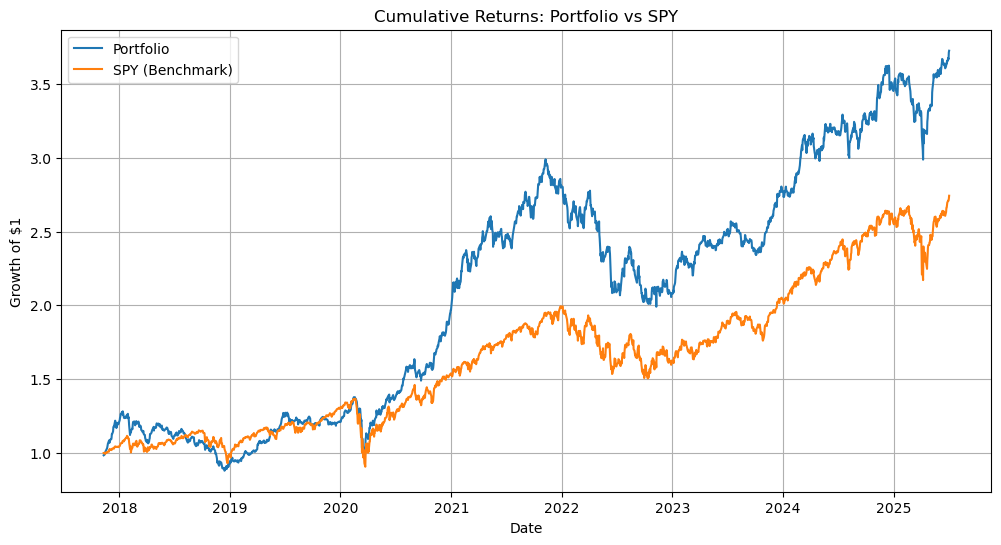

(Date
 2017-11-10    0.983768
 2017-11-13    0.988217
 2017-11-14    0.993509
 2017-11-15    1.000845
 2017-11-16    1.010879
                 ...   
 2025-06-27    3.651176
 2025-06-30    3.676012
 2025-07-01    3.667105
 2025-07-02    3.715037
 2025-07-03    3.725541
 Length: 1920, dtype: float64,
 Date
 2017-11-10    0.999690
 2017-11-13    1.000620
 2017-11-14    0.998296
 2017-11-15    0.993299
 2017-11-16    1.001743
                 ...   
 2025-06-27    2.697039
 2025-06-30    2.709934
 2025-07-01    2.709057
 2025-07-02    2.721338
 2025-07-03    2.742785
 Name: SPY, Length: 1920, dtype: float64)

In [66]:
price_data = get_data(tickers)
returns = price_data.pct_change().dropna()
results = calculate_performance(returns, weights)
SPY_Comparison(returns, weights, price_data)